In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import time
from divisive_solver.heuristic import MD_problem_heuristic
from divisive_solver.extra_functions import diversity_matrix
from divisive_solver.local_search import local_search_MA, local_search_MA_animated
import sklearn
from sklearn.datasets import make_blobs

# Generación de datos

## Datos en grupos con diversidad binaria

(1000, 2)


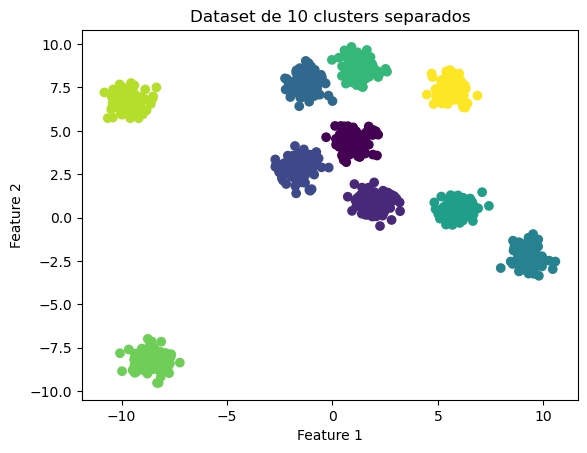

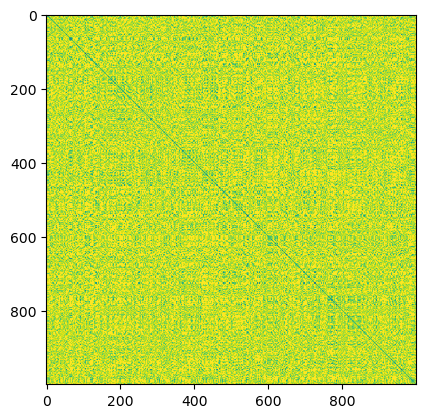

In [2]:
n_centers = 10
# Crea un dataset ficticio de 3 clusters separados
n_points = 1000
samples, y = make_blobs(n_samples=n_points, centers=n_centers, random_state=0, cluster_std=0.5)

print(samples.shape)

# Visualiza el dataset
plt.scatter(samples[:, 0], samples[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Dataset de {n_centers} clusters separados')
plt.show()

D_matrix = diversity_matrix(samples, y)
plt.imshow(D_matrix)
plt.plot()

N = samples
M_dim = 30

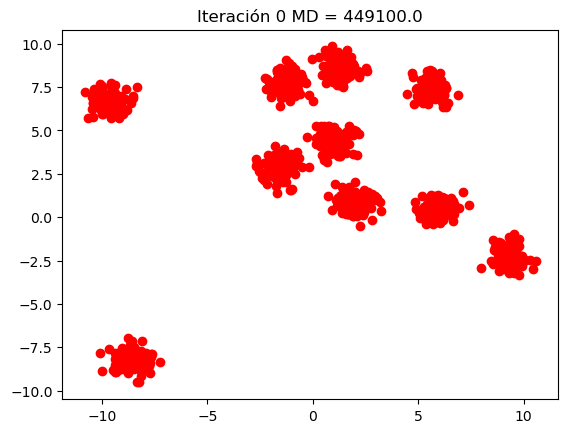

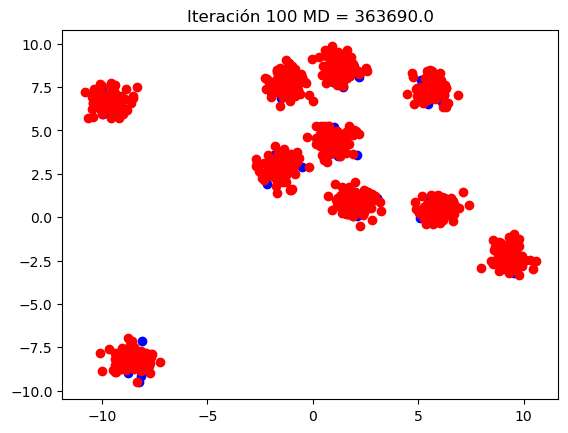

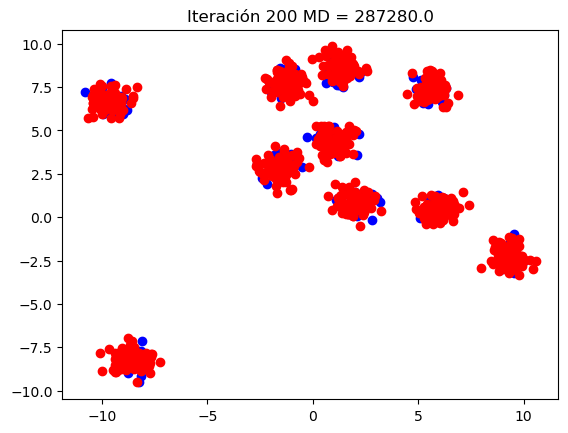

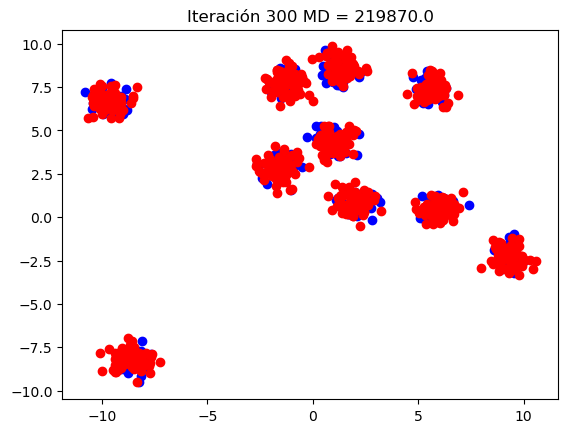

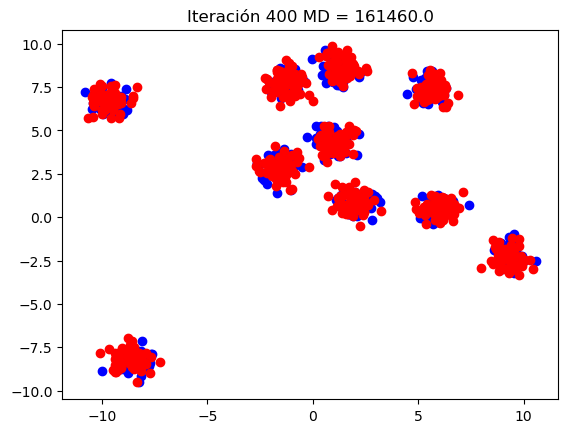

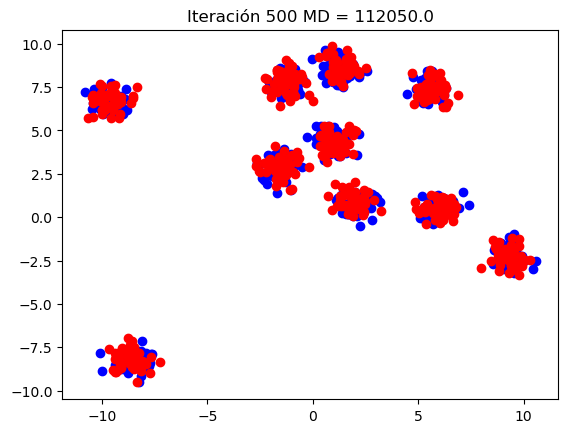

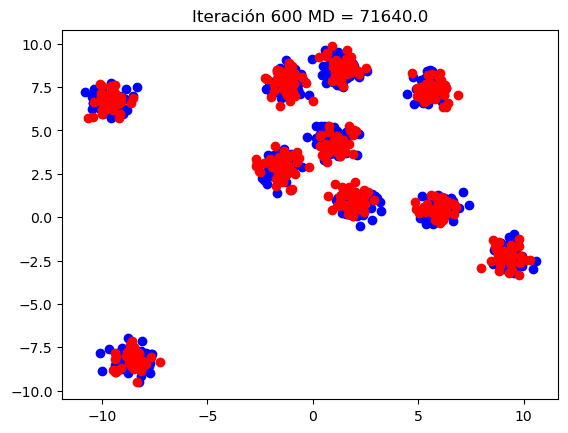

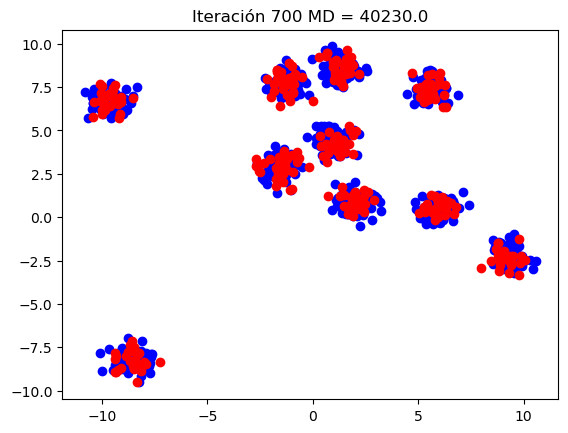

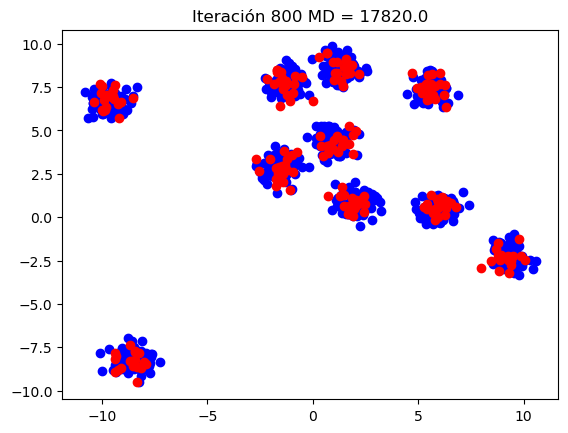

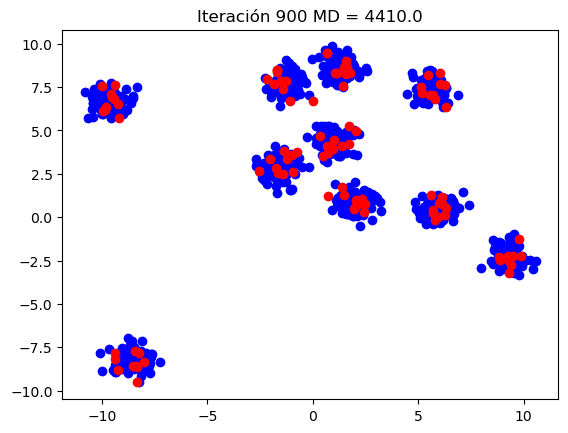

------------------------------------------------------------------------
---------------------------RESULTADOS-----------------------------------
------------------------------------------------------------------------
Vector X:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

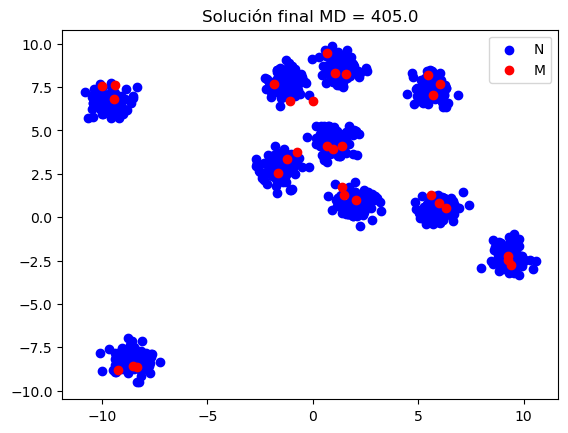

In [3]:
X, data, Da_m = MD_problem_heuristic(N, M_dim, 0, verbose = True, D_matrix = D_matrix, plot_int = 100)

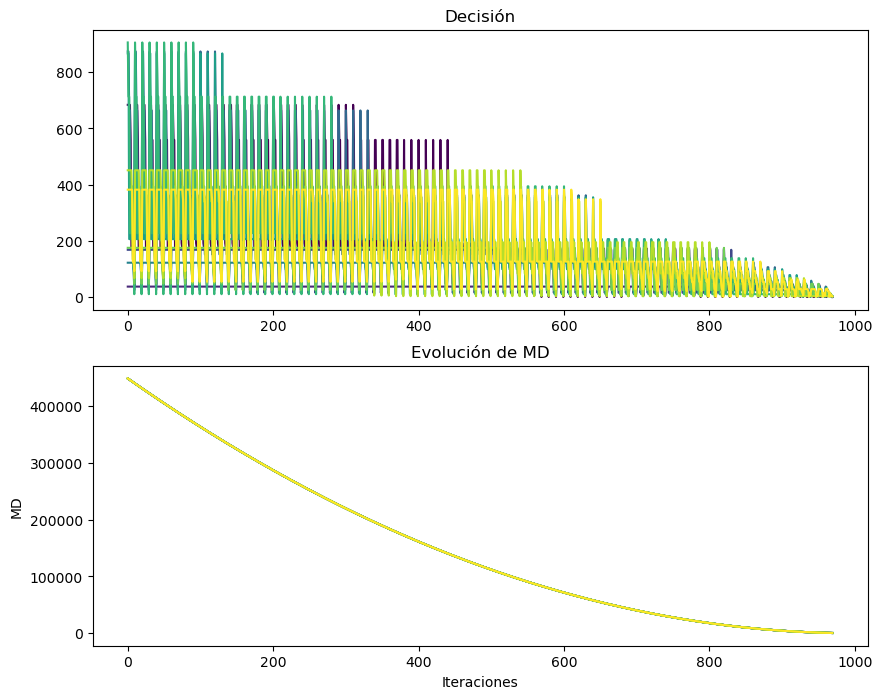

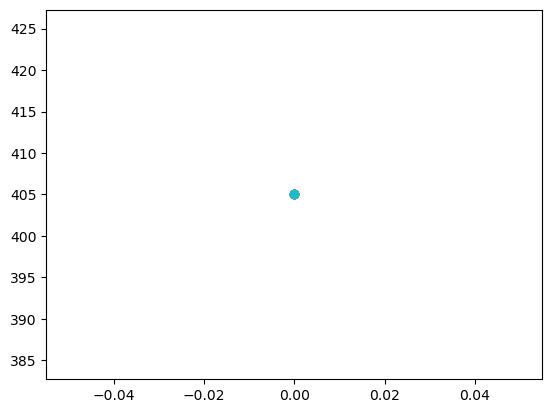

No se encontró mejora


(array([1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
        0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
        1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [4]:
seed = []
datas  = []
for i in range(10):
  X, data, Da_m = MD_problem_heuristic(N, M_dim, i, verbose = False, D_matrix = D_matrix)
  datas.append(data)
  seed.append(i)
# print(datas)
colores = plt.cm.viridis(np.linspace(0, 1, len(datas)))

fig, ax = plt.subplots(2, figsize=(10, 8))

for data, color in zip(datas, colores):
    ax[0].plot(data["Elección"], color=color)  # Utiliza el color específico para esta serie
    ax[0].set_title("Decisión")
    ax[1].plot(data["MD_ev"], color=color)     # Mismo color para la correspondiente evolución de MD
    ax[1].set_title("Evolución de MD")
    ax[1].set_xlabel("Iteraciones")
    ax[1].set_ylabel("MD")
    # ax[0].axis("off")
plt.show()
for data in datas:
  plt.scatter(0, data["MD_ev"][-1])
plt.show()
local_search_MA(X, Da_m, n_points-np.sum(X), np.sum(X)-1, verbose = True)

## Datos en distribuciones

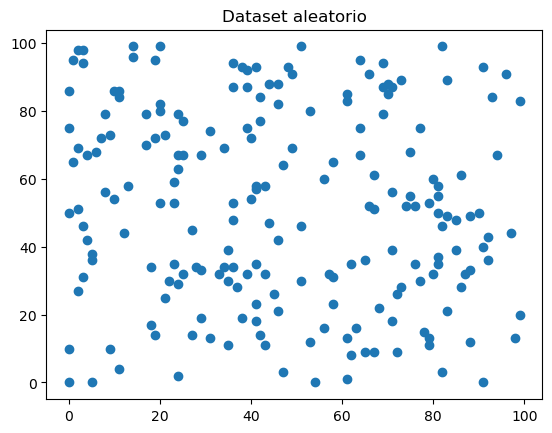

In [10]:
n_points = 200
np.random.seed(0)

# Opción para distribución normal
# mean = 0
# std_dev = 100
# N = np.random.normal(mean, std_dev, (n_points, 2))

# Opción para distribución uniforme de enteros
max_val = 100
min_val = 0
N = np.random.randint(min_val,max_val, size= (n_points,2))
M_dim = 17
plt.scatter(N[:, 0], N[:, 1])
plt.title('Dataset aleatorio')
plt.show()

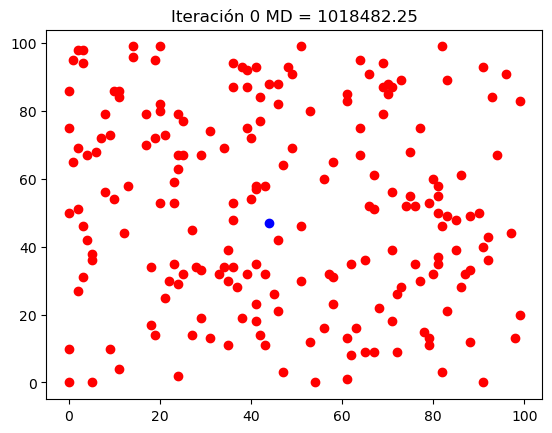

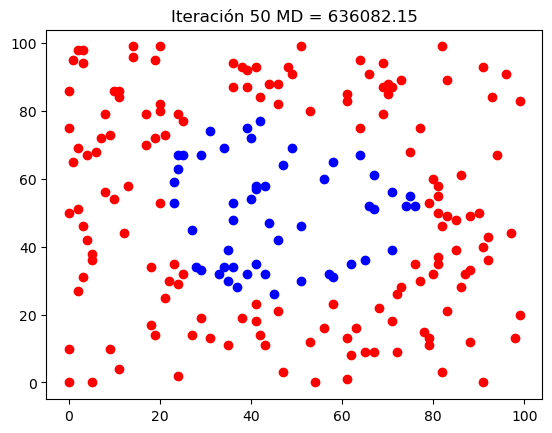

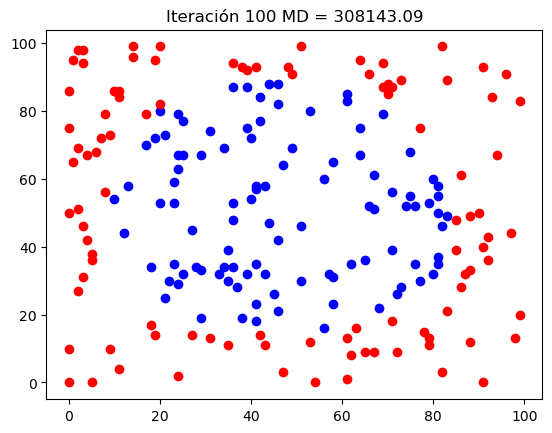

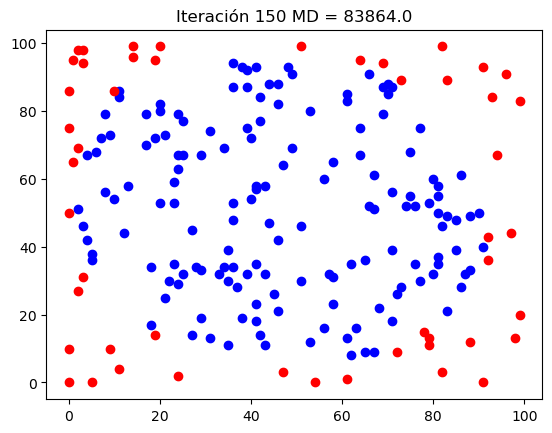

------------------------------------------------------------------------
---------------------------RESULTADOS-----------------------------------
------------------------------------------------------------------------
Vector X:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0.]
MD:  11167.051169095463
Tiempo:  0.6886625289916992


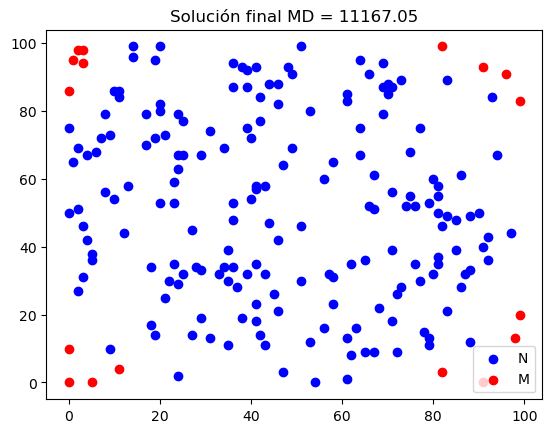

In [6]:
X, data, Da_m = MD_problem_heuristic(N, M_dim, 0, verbose = True, plot_int = 50)

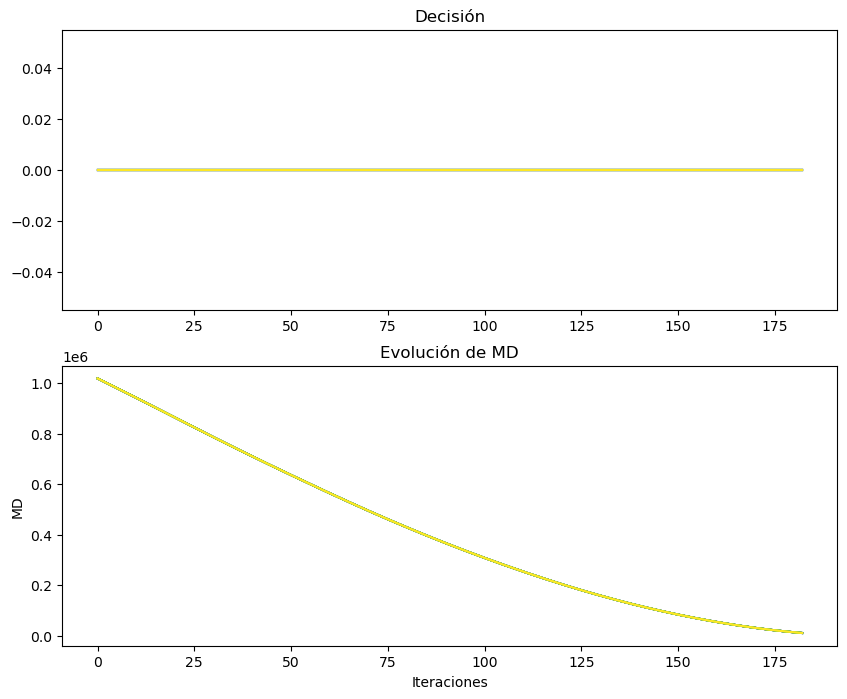

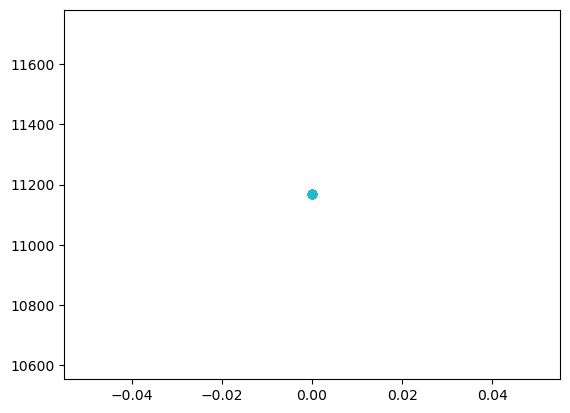

Número de iteraciones:  16
Solución inicial:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0.]
Valor de MD inicial:  11167.051169095463
Solución final:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

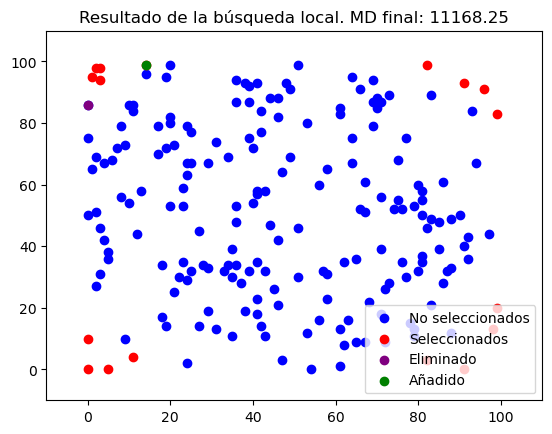

In [14]:
seed = []
datas  = []
for i in range(10):
  X, data, Da_m = MD_problem_heuristic(N, M_dim, i, verbose = False)
  datas.append(data)
  seed.append(i)
# print(datas)
colores = plt.cm.viridis(np.linspace(0, 1, len(datas)))

fig, ax = plt.subplots(2, figsize=(10, 8))

for data, color in zip(datas, colores):
    ax[0].plot(data["Elección"], color=color)  # Utiliza el color específico para esta serie
    ax[0].set_title("Decisión")
    ax[1].plot(data["MD_ev"], color=color)     # Mismo color para la correspondiente evolución de MD
    ax[1].set_title("Evolución de MD")
    ax[1].set_xlabel("Iteraciones")
    ax[1].set_ylabel("MD")
    # ax[0].axis("off")
plt.show()
for data in datas:
  plt.scatter(0, data["MD_ev"][-1])
plt.show()
X_star, improvement, out_index, in_index, new_MD = local_search_MA(X, Da_m, n_points-np.sum(X), np.sum(X)-1, verbose = True)
if improvement:
  plt.scatter(N[:, 0][X_star == 0], N[:, 1][X_star == 0], c='blue', label='No seleccionados')
  plt.scatter(N[:, 0][X_star == 1], N[:, 1][X_star == 1], c='red', label='Seleccionados')
  del_ind = np.where([X == 1] and [X_star == 0])[0]
  plt.scatter(N[in_index, 0], N[in_index, 1], c='purple', label='Eliminado')
  plt.scatter(N[out_index, 0], N[out_index, 1], c='green', label='Añadido')
  plt.title(f'Resultado de la búsqueda local. MD final: {new_MD:.2f}')
  plt.xlim(min_val-0.1*max_val, max_val+0.1*max_val)
  plt.ylim(min_val-0.1*max_val, max_val+0.1*max_val)
  plt.legend()
  plt.show()
  
  # plt.scatter(N[:, 0][X_star], N[:, 1][X_star == 1], c='red', label='Seleccionados')